Trabajo Practico 2

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from  collections  import defaultdict
from scipy import optimize
import os
from lectura import ldata
from math import log

In [2]:
# Red de interacciones binarias(yeast_Y2H.txt)
# Red de copertenecia o complejos proteícos(yeast_AP-MS.txt)
# Red obtenida de literatura: Yeast Interactome Database(yeast_LIT.txt)

In [3]:
# El directorio que vamos a usar en cada lectura de datos de ahora en mas
directorio = os.path.dirname(os.path.realpath("yeast_AP-MS.txt"))

In [4]:
fnMS = os.path.join(directorio,'tc02Data/yeast_AP-MS.txt')
fnLIT = os.path.join(directorio,'tc02Data/yeast_LIT.txt')
fnY2H = os.path.join(directorio,'tc02Data/yeast_Y2H.txt')
fnLIT_reg = os.path.join(directorio,'tc02Data/yeast_LIT_Reguly.txt')

# Lectura de datos
datosapms=ldata(fnMS)
datoslit=ldata(fnLIT)
datosy2h=ldata(fnY2H)
datoslit_reg=ldata(fnLIT_reg)
datoslit_reg=[row[0:2] for row in datoslit_reg][1:]


In [5]:
G1 = nx.Graph()
G2 = nx.Graph()
G3 = nx.Graph()
G4 = nx.Graph()

G1.add_edges_from(datosapms)
G2.add_edges_from(datoslit)
G3.add_edges_from(datosy2h)
G4.add_edges_from(datoslit_reg)



In [6]:
# Características de las redes

# Numero total de nodos
N = [G1.number_of_nodes(),G2.number_of_nodes(),G3.number_of_nodes(),G4.number_of_nodes()]

# Numero total de enlaces
L = [G1.number_of_edges(),G2.number_of_edges(),G3.number_of_edges(),G4.number_of_edges()]

# Grado medio
kmean = [np.mean(list(dict(G1.degree).values())),np.mean(list(dict(G2.degree).values())),
         np.mean(list(dict(G3.degree).values())),
         np.mean(list(dict(G4.degree).values()))]

# Coeficiente de clustering local
clusteringlocal = [nx.average_clustering(G1),nx.average_clustering(G2),nx.average_clustering(G3),nx.average_clustering(G4)]


In [7]:
# Tabla con las caraterísticas de las redes
info= pd.DataFrame({"ID":['apms','YID_lit','y2h','lit_reg'],"nodos":N,"enlaces":L,"kmean":kmean,
                    "clusteringlocal":clusteringlocal})

In [8]:
info

,ID,clusteringlocal,enlaces,kmean,nodos
0,apms,0.554636,9070,11.183724,1622
1,YID_lit,0.292492,2925,3.808594,1536
2,y2h,0.046194,2930,2.903865,2018
3,lit_reg,0.261134,11858,7.171454,3307


In [9]:
# Tabla con fracción de interacciones en común entre las redes

In [10]:
def overlap(red1,red2):
    cant=0
    for edge in red1.edges():
        if edge in red2.edges():
            cant+=1                        
    return float(cant)/float(red1.number_of_edges())

In [11]:
overlap(G1,G2)

0.14310915104740904

In [12]:
nombres=['apms','YID_lit','y2h','lit_reg']
grafos=[G1,G2,G3,G4]
columna=[0]*4
for j in np.arange(4):
    columna[j]=[0,0,0,0]
    for i in np.arange(4):
        if i==j:
            columna[j][i]=nombres[i]
        else:
            columna[j][i]=overlap(grafos[i],grafos[j])
            
tabla2=pd.DataFrame(columna)

In [13]:
tabla2

,0,1,2,3
0,apms,0.443761,0.0887372,0.212515
1,0.143109,YID_lit,0.0887372,0.241187
2,0.0286659,0.0888889,y2h,0.0403947
3,0.277839,0.977778,0.163481,lit_reg


In [14]:
fnessential = os.path.join(directorio,'tc02Data/Essential_ORFs_paperHe.txt')
essential=ldata(fnessential)
essential=[row[1] for row in essential[2:-4]]


In [15]:
def essentialhubs(grafo,essential):
    Nodos=sorted(grafo.degree, key=lambda x: x[1], reverse=True)
    CantidadHubs=np.arange(len(Nodos)+1)
    
    CantidadEssential=[0]
    PorcEssential=[0]
    contador=1
    for nodo in Nodos:
        if nodo[0] in essential:
            CantidadEssential.append(CantidadEssential[-1]+1)
        else:
            CantidadEssential.append(CantidadEssential[-1])
        PorcEssential.append((float(CantidadEssential[-1])/(CantidadHubs[contador])))
        
        #print(CantidadHubs[contador],contador,CantidadEssential[-1])
        contador+=1
    print float(len(Nodos))
    CantidadHubs=(np.array((CantidadHubs/float(len(Nodos)))))
      
    return [CantidadHubs,PorcEssential]

1622.0
1536.0
2018.0
3307.0


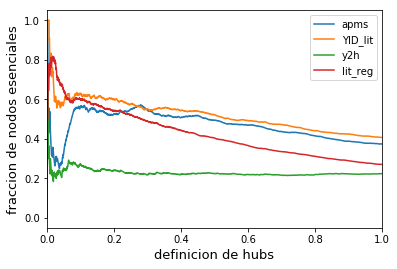

[<networkx.classes.graph.Graph object at 0x7fce51c4f910>, <networkx.classes.graph.Graph object at 0x7fce51c4fbd0>, <networkx.classes.graph.Graph object at 0x7fce51c4ff10>, <networkx.classes.graph.Graph object at 0x7fce51c4fb10>]


In [16]:
for i in np.arange(4):
    cantidad,esencial=essentialhubs(grafos[i],essential)
    #print cantidad,esencial
    
    plt.plot(cantidad,esencial) 
    plt.ylabel("fraccion de nodos esenciales",fontsize=13)
    plt.xlabel("definicion de hubs",fontsize=13)
    plt.xlim(0,1)
plt.legend((nombres))
plt.show()


print (grafos)

In [17]:
#.degree
#eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)
#subgraph_centrality(G)
#betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)
#current_flow_closeness_centrality(G, weight='weight', dtype=<type 'float'>, solver='lu')
#len(max(nx.connected_component_subgraphs(G1), key=len).nodes())

In [18]:
import random

In [30]:
def vulnerability(Grafo,essential):
    randomlist=[]
    fraccion=[]
    
    Gramdon=Grafo.copy()
    i=0   
    
    componente=max(nx.connected_component_subgraphs(Gramdon), key=len)  #Elegimos componente
    
    tamano = len(componente)      # arranco con el tamaño de la componente principal
    while len(componente)>0:        
            componente=max(nx.connected_component_subgraphs(componente), key=len) # Recalculo la componente principal
            randomlist.append(len(componente)/float(tamano))         # tamaño de la componente (normalizado)
            fraccion.append(i/float(tamano))                        #Cantidad de nodos que sacamos (normalizado)
            
               
            nodo=random.choice(list(componente.nodes())) 
            componente.remove_node(nodo)
            i+=1 
    return fraccion,randomlist

In [37]:
def vulnerabilitygrado(Grafo,essential):
    gradolist=[]
    fracciongrado=[]
    Ggrado=Grafo.copy()
    i=0   
    
    componente=max(nx.connected_component_subgraphs(Ggrado), key=len)
    tamano = len(componente)
    #Nodos=sorted(G.degree, key=lambda x: x[1], reverse=True)
    while len(componente)>0:        
            componente=max(nx.connected_component_subgraphs(componente), key=len)
            gradolist.append(len(componente)/float(tamano))
            fracciongrado.append(i/float(tamano))
            
            nodo=max(componente.degree,key=len)                
            componente.remove_node(nodo[0])
            i+=1
    
                 
    return fracciongrado,gradolist

In [100]:
def vulnerabilityautovec(Grafo,essential):
    autoveclist=[]
    fraccionautivec=[]   
    Gauv=Grafo.copy()
    i=0
    
    componente=max(nx.connected_component_subgraphs(Gauv), key=len)
    tamano = len(componente)
    while len(componente)>0:
            componente=max(nx.connected_component_subgraphs(componente), key=len)
            autoveclist.append(len(componente)/float(tamano))
            fraccionautivec.append(i/float(tamano))            
            nodo=max(nx.eigenvector_centrality(componente,max_iter=50),key=len)            
            componente.remove_node(nodo)
            i+=1  
   
    return fraccionautivec,autoveclist

In [44]:
def vulnerabilitysubgraph(Grafo,essential):
    subgraphlist=[]
    fraccionsubgra=[]
    
    Gsub=Grafo.copy()
    i=0
    
    componente=max(nx.connected_component_subgraphs(Gsub), key=len)
    tamano = len(componente)
    while len(componente)>0:
            componente=max(nx.connected_component_subgraphs(componente), key=len)
            subgraphlist.append(len(componente)/float(tamano))
            fraccionsubgra.append(i/float(tamano))
            
            nodo=max(nx.subgraph_centrality(componente), key=len)       
            componente.remove_node(nodo)
            i+=1
    return fraccionsubgra,subgraphlist

In [61]:
def vulnerabilitybetweeness(Grafo,essential):
    betweenesslist=[]
    fraccion=[]
    G=Grafo.copy()
    i=0
    
    componente=max(nx.connected_component_subgraphs(G), key=len)
    tamano=len(componente)
    while len(componente)>0:
            componente=max(nx.connected_component_subgraphs(componente), key=len)
            betweenesslist.append(len(componente)/float(tamano))
            fraccion.append(i/float(tamano))
            
            nodo=max(nx.betweenness_centrality(componente, k=None, normalized=True, 
                                               weight=None, endpoints=False, seed=None),key=len)
            componente.remove_node(nodo)            
            i+=1
            
    return fraccion,betweenesslist

In [47]:
def vulnerabilityflow(Grafo,essential):
    flowlist=[]
    fraccion=[]
    
    G=Grafo.copy()
    i=0
    Nodos=sorted(nx.current_flow_closeness_centrality(max(nx.connected_component_subgraphs(G), key=len), 
                                                      weight=None, solver='lu'), key=lambda x: x[1], reverse=True)
    
    componente=max(nx.connected_component_subgraphs(G), key=len)
    tamano=len(componente)
    
    while len(componente)>0:
        componente=max(nx.connected_component_subgraphs(componente), key=len)
        flowlist.append(len(componente)/float(tamano))
        fraccion.append(i/float(tamano))
        nodo=max(nx.current_flow_closeness_centrality(componente),key=len)
        componente.remove_node(nodo)
        i+=1
    return fraccion,flowlist

In [77]:
def vulnerabilityessential(Grafo,essential):
    G=Grafo.copy()
    tamano=len(list(Grafo.nodes()))   
    print tamano
    for nodo in Grafo.nodes():
        if nodo in essential:
            G.remove_node(nodo)
            
    essential=len(max(nx.connected_component_subgraphs(G), key=len).nodes())/float(tamano)
    fraccion3=(len(Grafo)-len(G))/float(tamano)

    return fraccion3,essential,len(Grafo)-len(G)

In [26]:
#No correr estos, salvo que queramos probar uno por uno

In [92]:
f2,vgrado=vulnerabilitygrado(G4,essential)

3307


In [101]:
f3,lcautovec=vulnerabilityautovec(G4,essential)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 50 iterations')

In [102]:
f4,lcsubgraph=vulnerabilitysubgraph(G4,essential)

In [ ]:
f5,lcbetweeness=vulnerabilitybetweeness(G4,essential)

In [80]:
f6,lcflow=vulnerabilityflow(G4,essential)

In [95]:
f7,lcessential,cant=vulnerabilityessential(G4,essential)

3307


In [90]:
#Todo Junto
#G=G2 #Hay que cambiar para hacer el de otros graficos
#Para el metodo random realizamos 10 iteraciones y elegimos el promedio de todas
lcs=[]
for i in np.arange(3):
    f1,lista=vulnerability(G4,essential)    
    lcs.append(lista)
lc=[np.mean(a) for a in list((zip(lcs[0],lcs[1],lcs[2])))]
print len(lc), len(f1)

2005 2005


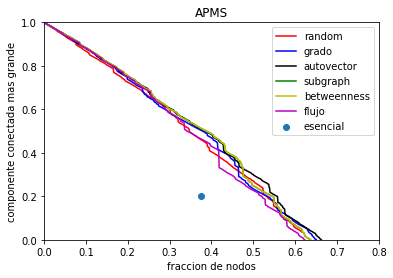

In [64]:
# Red 1
"""
plt.plot(f1,lc,"r", label='random')
plt.plot(f2,vgrado,"b", label='grado')
plt.plot(f3,lcautovec,"k", label='autovector')
plt.plot(f4,lcsubgraph,"g", label='subgraph')
plt.plot(f5,lcbetweeness,"y", label='betweenness')
plt.plot(f6,lcflow,"m", label='flujo')
plt.scatter(f7,lcessential, label='esencial')
plt.xlabel("fraccion de nodos")
plt.ylabel("componente conectada mas grande")
plt.ylim(0,1,0.2)
plt.xlim(0,0.8)
plt.legend()
plt.title("APMS")
plt.show()
"""

511 511


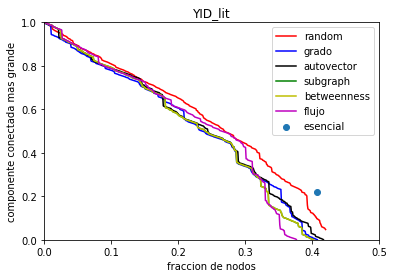

In [49]:
# Red 2
"""
plt.plot(f1,lc,"r", label='random')
plt.plot(f2,vgrado,"b", label='grado')
plt.plot(f3,lcautovec,"k", label='autovector')
plt.plot(f4,lcsubgraph,"g", label='subgraph')
plt.plot(f5,lcbetweeness,"y", label='betweenness')
plt.plot(f6,lcflow,"m", label='flujo')
plt.scatter(f7,lcessential, label='esencial')
plt.xlabel("fraccion de nodos")
plt.ylabel("componente conectada mas grande")
plt.ylim(0,1,0.2)
plt.xlim(0,0.5)
plt.legend()
plt.title("YID_lit")
plt.show()
"""

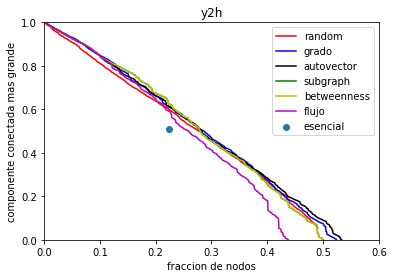

In [86]:
# Red 3
""""
plt.plot(f1,lc,"r", label='random')
plt.plot(f2,vgrado,"b", label='grado')
plt.plot(f3,lcautovec,"k", label='autovector')
plt.plot(f4,lcsubgraph,"g", label='subgraph')
plt.plot(f5,lcbetweeness,"y", label='betweenness')
plt.plot(f6,lcflow,"m", label='flujo')
plt.scatter(f7,lcessential, label='esencial')
plt.xlabel("fraccion de nodos")
plt.ylabel("componente conectada mas grande")
plt.ylim(0,1,0.2)
plt.xlim(0,0.6)
plt.legend()
plt.title("y2h")
plt.show()
"""

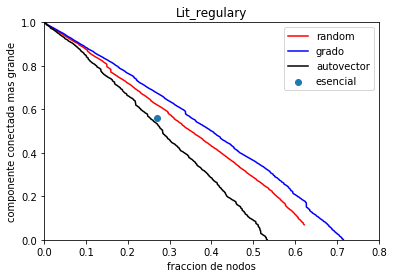

In [103]:
# Red 4

plt.plot(f1,lc,"r", label='random')
plt.plot(f2,vgrado,"b", label='grado')
plt.plot(f3,lcautovec,"k", label='autovector')
#plt.plot(f4,lcsubgraph,"g", label='subgraph')
#plt.plot(f5,lcbetweeness,"y", label='betweenness')
#plt.plot(f6,lcflow,"m", label='flujo')
plt.scatter(f7,lcessential, label='esencial')
plt.xlabel("fraccion de nodos")
plt.ylabel("componente conectada mas grande")
plt.ylim(0,1,0.2)
plt.xlim(0,0.8)
plt.legend()
plt.title("Lit_regulary")
plt.show()


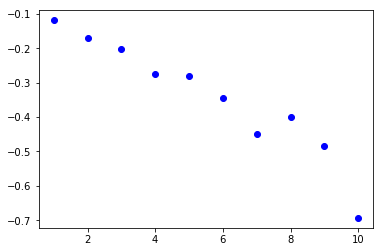

In [36]:
# Figura 2b  de HE (2006)

Grafo=G4.copy()
HEnorm={}
HEessencial={}
for nodo in Grafo.nodes():
    grado=Grafo.degree(nodo)
    if grado<11:
        try:
            HEnorm[grado]+=1
        except:
            HEnorm[grado]=1

        if nodo in essential:
            try:
                HEessencial[grado]+=1
            except:
                HEessencial[grado]=1

Porc={}
for i in sorted(HEnorm.keys()):
    try:
        Porc[i]=log(1-(HEessencial[i]/HEnorm[i]))
    except:
        Porc[i]=log(1)
plt.plot(list(Porc.keys()),list(Porc.values()),'bo')
plt.show()

-0.0437694079108 -0.0542042121692
0.0481586382889


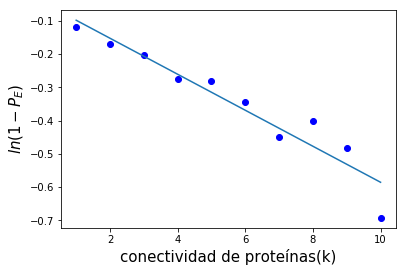

In [64]:

# Ajuste de la recta

datox=np.array(list(Porc.keys()))
datoy=np.array(list(Porc.values()))

fitfunc = lambda p, x: p[0] + x* p[1] 
errfunc = lambda p, x, y: (y - fitfunc(p, x)) 

pinit = [1, 1]
out = optimize.leastsq(errfunc, pinit,  args=(datox,datoy), full_output=1)
pfinal = out[0]

rms = np.sqrt(np.mean(errfunc(pfinal,datox,datoy)**2))

print(pfinal[0],pfinal[1])
print(rms)

recta=[fitfunc(pfinal,x) for x in datox ]

plt.clf()
plt.plot(datox,datoy,'bo')
plt.plot(datox, recta)     # Fit
plt.xlabel("conectividad de proteínas(k)",fontsize = 15)
plt.ylabel('$ln(1-P_E)$', fontsize = 15)
#plt.anotate(poner el valor del Ln,r y p)
plt.show()

In [40]:
## Tabla 3 Zotenco (2008)

In [45]:
def gradoesencial(Grafo,essential):
        G=Grafo.copy()
        tamaño=np.max(list(dict(G.degree()).values()))
        gradosdeesencial={}
        for i in range(tamaño+1):
                gradosdeesencial[i]=0

        for nodo in G.nodes():
            if nodo in essential:
                gradosdeesencial[G.degree[nodo]]+=1
    
        return gradosdeesencial



def seleccionar(Grafo,essential,gradosdeesencial):
        G=Grafo.copy()
        listadeseleccion=[]

        diccionariodegrados=dict(G.degree())

        for gradoorden in gradosdeesencial.keys():
                listaseleccionadaporgrados=[]
                listaparaagregar=[]
                for nodos,grados in diccionariodegrados.items():
                        if grados==gradoorden:
                                listaseleccionadaporgrados.append(nodos)
                listaparaagregar=random.sample(listaseleccionadaporgrados,gradosdeesencial[gradoorden])
                listadeseleccion.extend(listaparaagregar)
        return listadeseleccion

In [56]:
def randomcongrado(grafo,essential):
    randomlist=[]
    for i in np.arange(100):
        gradoesencial1=gradoesencial(grafo,essential)
        lista=seleccionar(grafo,essential,gradoesencial1)
        f,reslista,cant= vulnerabilityessential(grafo,lista)
        randomlist.append(reslista)
    M = np.mean(randomlist)
    S = np.std(randomlist)
    return M,S

In [57]:
i=0
ESSENTIAL=[0]*4
MEAN=[0]*4
STD=[0]*4
for grafo in grafos:
    f,ESSENTIAL[i],cant= vulnerabilityessential(grafo,essential)
    MEAN[i],STD[i]=randomcongrado(grafo,essential)
    i+=1

In [58]:
STD

[0.032005486539914037,
 0.032994208447390865,
 0.011023596405319504,
 0.010840999539013638]

In [59]:
Tabla3= pd.DataFrame({"ID":['apms','YID_lit','y2h','lit_reg'],"essential":ESSENTIAL,"random":MEAN,"error":STD})

In [60]:
print(Tabla3)

        ID     error  essential    random
0     apms  0.032005   0.200370  0.210561
1  YID_lit  0.032994   0.222005  0.078268
2      y2h  0.011024   0.509415  0.488578
3  lit_reg  0.010841   0.560629  0.513441
